# Описательная статистика. Качественные и количественные характеристики популяции.Графическое представление данных
### Задача 1

Даны значения зарплат из выборки выпускников:

`100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150`

Своими руками (т.е. без использования статистических функций вроде `mean`, `std`, `var`) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

#### Решение

$\overline{x} = \dfrac{1}{n} \displaystyle\sum_{i = 1}^{n} x_i$ — среднее арифметическое

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

x = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])

x_mean = sum(x)/len(x)
print('Среднее арифметическое = {}'.format(x_mean))

Среднее арифметическое = 73.14285714285714


$\sigma^2 = \dfrac{1}{n} \displaystyle\sum_{i = 1}^{n} \left( x_i - \overline{x} \right)^2$ — смещенная оценка дисперсии

In [2]:
print('Смещенная оценка дисперсии = {}'.format(sum((x - x_mean)**2 / len(x))))

Смещенная оценка дисперсии = 2135.074829931973


$\sigma^2_{unbiased}  = \dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^{n} \left( x_i - \overline{x} \right)^2$ — несмещенная оценка дисперсии

In [3]:
print('Несмещенная оценка дисперсии = {}'.format(sum((x - x_mean)**2 / (len(x) - 1))))

Несмещенная оценка дисперсии = 2241.8285714285716


$\sigma =  \sqrt{\dfrac{1}{n} \displaystyle\sum_{i = 1}^{n} \left( x_i - \overline{x} \right)^2}$ — смещенное среднее квадратическое отклонение

In [4]:
print('Смещенное среднее квадратическое отклонение = {}'.format(np.sqrt(sum((x - x_mean)**2 / len(x)))))

Смещенное среднее квадратическое отклонение = 46.20686994302874


$\sigma_{unbiased} = \sqrt{\dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^{n} \left( x_i - \overline{x} \right)^2}$ — несмещенное среднее квадратическое отклонение

In [5]:
print('Несмещенное среднее квадратическое отклонение = {}'.format(np.sqrt(sum((x - x_mean)**2 / (len(x) - 1)))))

Несмещенное среднее квадратическое отклонение = 47.34795213553139


#### Проверка



In [6]:
x.mean()

73.14285714285714

In [7]:
x.var()

2135.0748299319725

In [8]:
x.var(ddof=1)

2241.828571428571

In [9]:
x.std()

46.206869943028735

In [10]:
x.std(ddof=1)

47.347952135531386

### Задача 2

Для выборки из задачи 1 найти (также без использования статистических функций) медиану, первый и третий квартили, интерквартильное расстояние. Найти выбросы в выборке, используя для этого "усы" из `boxplot`.

В этой задаче неоднозначности в вычислении квантилей можно разрешать любым способом.

In [11]:
x.sort()
print(*x)

17 24 25 30 33 45 55 57 65 65 70 75 75 77 80 84 89 90 100 150 230


In [12]:
l = len(x)
print(f'Количество элементов в выборке = {l}')

Количество элементов в выборке = 21


In [13]:
print(f'Медиана = {x[l // 2]}')

Медиана = 70


In [14]:
q1 = x[l // 4]
print(f'Первый квартиль = {q1}')

Первый квартиль = 45


In [15]:
q3 = x[l * 3 // 4]
print(f'Третий квартиль = {q3}')

Третий квартиль = 84


In [16]:
iqr = q3 - q1
print(f'Интерквартильное расстояние = {iqr}')

Интерквартильное расстояние = 39


In [17]:
q1 - 1.5 * iqr, q3 + 1.5 * iqr

(-13.5, 142.5)

Будем сичтать выбросами элементы выборки за пределами отрезка $\left[ Q1 - 1.5 \times IQR, \: Q3 + 1.5 \times IQR \right]$, то есть в нашем случае $[-13.5, 142.5]$
То есть выбросы - это $150$ и $230$

А теперь с помощью `boxplot`

In [18]:
df = pd.DataFrame({'x': x})

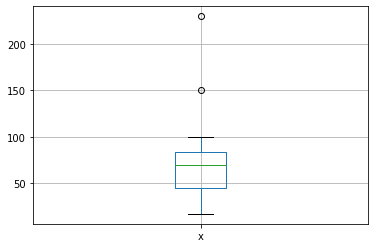

In [19]:
df.boxplot();

### Задача 3

В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?

### Решение
Обозначим события.

$X$ – студент сдал первую сессию,

$A, B, C$ – студент учится на факультете `A`, `B`, `C` соответственно.

$P(X|A) = 0.8$ – вероятность того, что студент факультета `A` сдаст первую сессию,

$P(X|B) = 0.7$ – вероятность того, что студент факультета `B` сдаст первую сессию,

$P(X|C) = 0.9$ – вероятность того, что студент факультета `C` сдаст первую сессию,

$P(A) = 0.25$ – вероятность того, что случайный студент с факультета `A`,

$P(B) = 0.25$ – вероятность того, что случайный студент с факультета `B`,

$P(C) = 0.5$ – вероятность того, что случайный студент с факультета `C`.

По формуле полной вероятности $P(X) = P(X|A)P(A) + P(X|B)P(B) + P(X|C)P(C) = 0.8 \cdot 0.25 + 0.7 \cdot 0.25 + 0.9 \cdot 0.5 = 0.825$

а) $P(A|X) = \dfrac{P(X|A)P(A)}{P(X)} = \dfrac{0.8 \cdot 0.25}{0.825} = \dfrac{8}{33}$ – вероятность того, что студент, сдавший сессию, оказался с факультета `A`.

б) $P(B|X) = \dfrac{P(X|B)P(B)}{P(X)} = \dfrac{0.7 \cdot 0.25}{0.825} = \dfrac{7}{33}$ – вероятность того, что студент, сдавший сессию, оказался с факультета `B`.

в) $P(C|X) = \dfrac{P(X|C)P(C)}{P(X)} = \dfrac{0.9 \cdot 0.5}{0.825} = \dfrac{18}{33}$ – вероятность того, что студент, сдавший сессию, оказался с факультета `C`.